In [ ]:
from google.colab import files
uploaded = files.upload()  # Select the ZIP file containing train.csv and test.csv


Saving house-prices-advanced-regression-techniques.zip to house-prices-advanced-regression-techniques.zip


In [ ]:
import pandas as pd
import io
import zipfile

# Assuming 'uploaded' is a dictionary containing the uploaded files
# Get the filename of the uploaded ZIP file (the key in the 'uploaded' dictionary)
zip_filename = list(uploaded.keys())[0]

# Extract the 'train.csv' and 'test.csv' files from the ZIP file
with zipfile.ZipFile(io.BytesIO(uploaded[zip_filename]), 'r') as zip_ref:
    train_data = pd.read_csv(zip_ref.open('train.csv'))
    test_data = pd.read_csv(zip_ref.open('test.csv'))

# Preview the datasets
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Train Data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008 

In [ ]:
print("Missing values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing values in Test Data:")
print(test_data.isnull().sum())


Missing values in Train Data:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Missing values in Test Data:
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


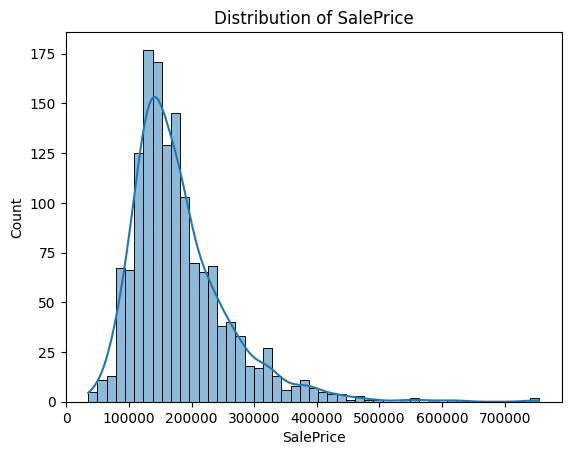

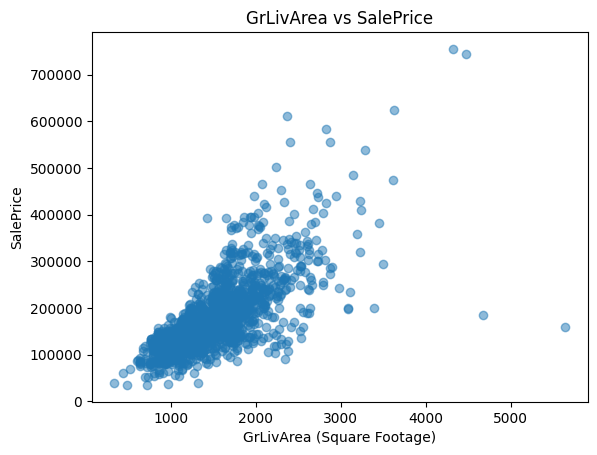

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of SalePrice
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# Example: Scatter plot between GrLivArea and SalePrice
plt.scatter(train_data['GrLivArea'], train_data['SalePrice'], alpha=0.5)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (Square Footage)')
plt.ylabel('SalePrice')
plt.show()


In [ ]:
# Choosing GrLivArea, BedroomAbvGr, and FullBath as features
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Handle missing values by dropping rows with missing target
train_data = train_data.dropna(subset=[target])

# Prepare X (features) and y (target) for training
X_train = train_data[features]
y_train = train_data[target]

# For test data
X_test = test_data[features].fillna(0)  # Replace missing values with 0 (or another strategy)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the training data into train and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_tr, y_tr)

# Validate the model
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5

print("Validation RMSE:", rmse)


Validation RMSE: 52975.71771338122


In [ ]:
coeff = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coeff)


        Feature   Coefficient
0     GrLivArea    104.026307
1  BedroomAbvGr -26655.165357
2      FullBath  30014.324109


In [ ]:
test_predictions = model.predict(X_test)


In [ ]:
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)

print("Submission file created.")


Submission file created.


In [ ]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>